In [53]:
%matplotlib inline

# Setup for getting post text

In [24]:
import os

from nikola import Nikola
from nikola.utils import get_root_dir

# Switch to root dir before doing anything
os.chdir(get_root_dir())

def get_nikola_posts():
    conf_filename = 'conf.py'
    with open(conf_filename) as f:
        code = f.read()
    config = {}
    exec(code, None, config)
    site = Nikola(**config)
    site.init_plugins()
    site.scan_posts()
    return [p for p in site.timeline if p.use_in_feeds]


POSTS = get_nikola_posts()
TEXTS = [
    '{} {}'.format(post.title(), post.text(strip_html=True).lower())
    for post in posts
]
TITLES = [post.title() for post in posts]

Scanning posts...done!


## Tf-idf Vectorization

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

def vectorize_documents(documents, **kwargs):
    vectorizer = TfidfVectorizer(**kwargs)
    return vectorizer.fit_transform(documents), vectorizer.get_feature_names()

X, VOCABULARY = vectorize_documents(TEXTS, max_df=0.5, min_df=2, stop_words='english')

# k-Means

## Silhouette Analysis


Selecting the number of clusters with silhouette analysis on KMeans clustering

Silhouette analysis can be used to study the separation distance between the
resulting clusters. The silhouette plot displays a measure of how close each
point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a
range of [-1, 1].

Silhoette coefficients (as these values are referred to as) near +1 indicate
that the sample is far away from the neighboring clusters. A value of 0
indicates that the sample is on or very close to the decision boundary between
two neighboring clusters and negative values indicate that those samples might
have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for
``n_clusters``. The silhouette plot shows that the ``n_clusters`` value of 3, 5
and 6 are a bad pick for the given data due to the presence of clusters with
b

Scanning posts...done!


Dimensionality reduction
(340, 3)
Keywords for cluster 0: github, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 1: use, work, don, like, post, people, things, time, code, just

Titles for cluster 0:     Save the Map -- Please respond     Thinking about Data Ethics     Level-up Tools     blog-admin and Nikola     Tedium in work-flows     Error messages and new users     Deoriatal and Chandrashila     Book Review: 5 Love Languages     Partial postgres db dumps for a Django app     Clock in and get-shit-done     Elfeed hook to fetch full content     Say Howdy with Emacs!     WiFi Channels & my router's random invisibility     Playing music using mpsyt from Emacs     org-drill for making it stick!     How I learnt to use Emacs' profiler     Jabber message queue     Using tmux to "screen share"     erc-notifications when Emacs not in focus     More input sources for org-drill     Bookmarks [2014-11-01]     Martin Fowler on Refactoring @ RubyRogue

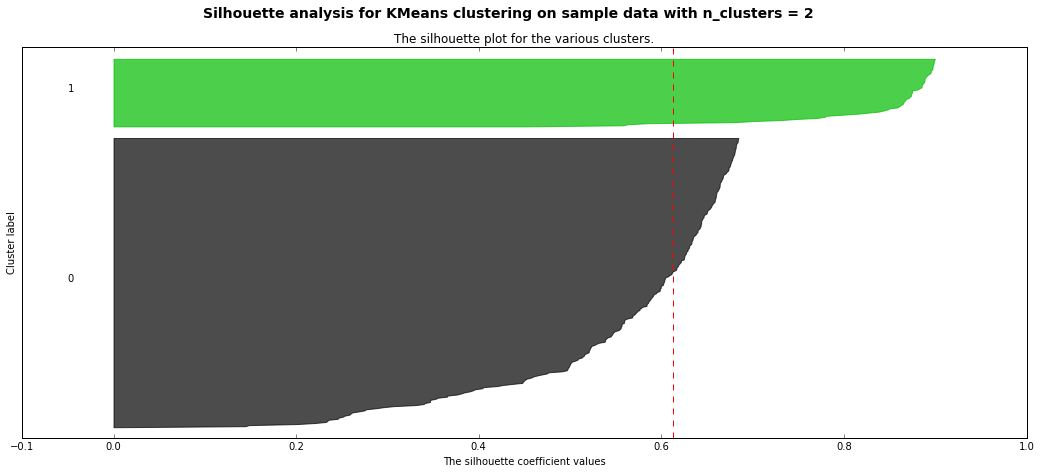

Keywords for cluster 0: blog, org2blog, work, use, using, post, emacs, code, mode, org
Keywords for cluster 1: github, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 2: good, world, like, day, code, don, things, people, time, just

Titles for cluster 0:     Save the Map -- Please respond     Thinking about Data Ethics     Level-up Tools     Deoriatal and Chandrashila     Book Review: 5 Love Languages     Bookmarks [2014-10-10]     Recurse Center, 2014-08-28     Recurse Center, 2014-08-25     Recurse Center, 2014-08-19     Bookmarks [2014-08-15]     Recurse Center, 2014-08-14     Recurse Center, 2014-07-31     Recurse Center, 2014-07-30     Recurse Center, 2014-07-29     Recurse Center, 2014-07-24     Recurse Center, 2014-07-22     Recurse Center, 2014-07-20     Recurse Center, 2014-07-18     Recurse Center, 2014-07-14     Recurse Center, 2014-07-10     Recurse Center, 2014-07-07     Recurse Center, 2014-06-27     Recurse Center, 2014-06-25   

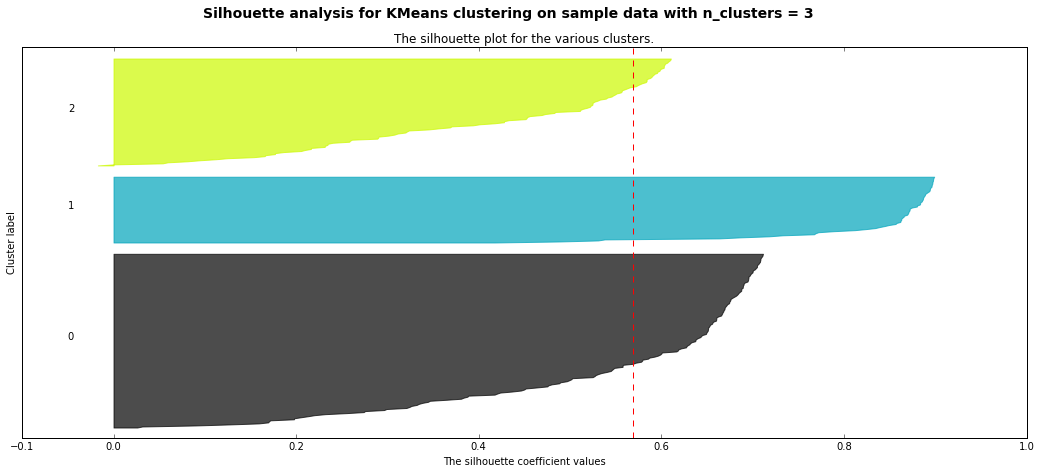

Keywords for cluster 0: work, like, using, people, things, post, time, just, org, code
Keywords for cluster 1: github, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 2: blog, nikola, use, org2blog, using, post, code, emacs, mode, org
Keywords for cluster 3: like, good, org, day, don, world, things, people, time, just

Titles for cluster 0:     Save the Map -- Please respond     Thinking about Data Ethics     Deoriatal and Chandrashila     Book Review: 5 Love Languages     Recurse Center, 2014-08-28     Recurse Center, 2014-07-31     Recurse Center, 2014-06-25     Recurse Center, 2014-06-09     Bookmarks [2014-05-19]     Bookmarks [2014-05-04]     Bookmarks [2014-04-29]     Bookmarks [2014-04-11]     Bookmarks [2014-03-12]     Bookmarks [2014-02-21]     Bookmarks [2014-02-12]     Bookmarks [2014-02-10]     Bookmarks [2014-01-08]     Bookmarks [2013-12-24]     Bookmarks [2013-12-23]     Bookmarks [2013-12-16]     Bookmarks [2013-12-10]     Book

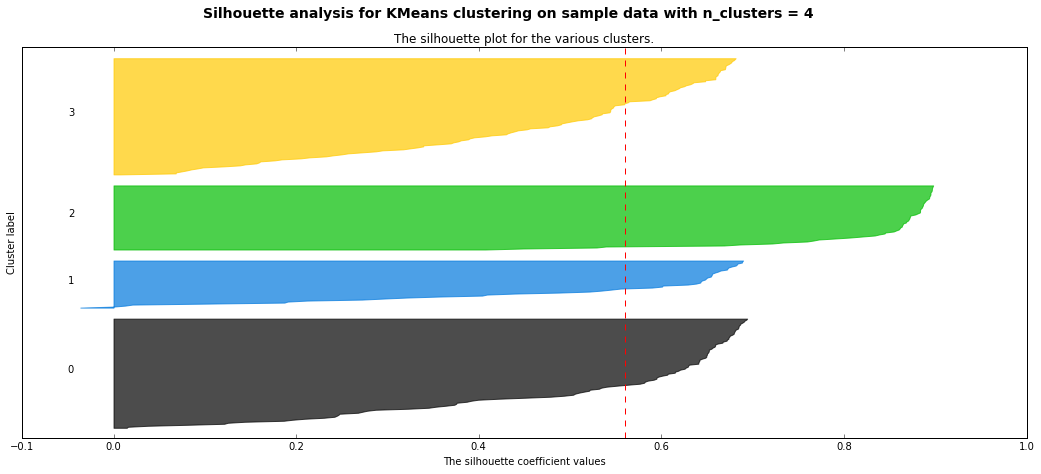

Keywords for cluster 0: like, good, day, don, world, things, org, people, time, just
Keywords for cluster 1: blog, nikola, use, org2blog, post, using, code, emacs, mode, org
Keywords for cluster 2: github, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 3: stuff, day, post, don, like, code, things, people, time, just
Keywords for cluster 4: things, use, time, just, using, emacs, mode, post, code, org

Titles for cluster 0:     Tedium in work-flows     Error messages and new users     Partial postgres db dumps for a Django app     Say Howdy with Emacs!     WiFi Channels & my router's random invisibility     Jabber message queue     Using tmux to "screen share"     Bookmarks [2014-11-01]     Martin Fowler on Refactoring @ RubyRogues     Learning about Spaced Repetition, SuperMemo, Org-drill, et al.     Making PyCon India better (for myself)     Recurse Center, 2014-08-27     Recurse Center, 2014-08-26     Recurse Center, 2014-08-24     Recurse C

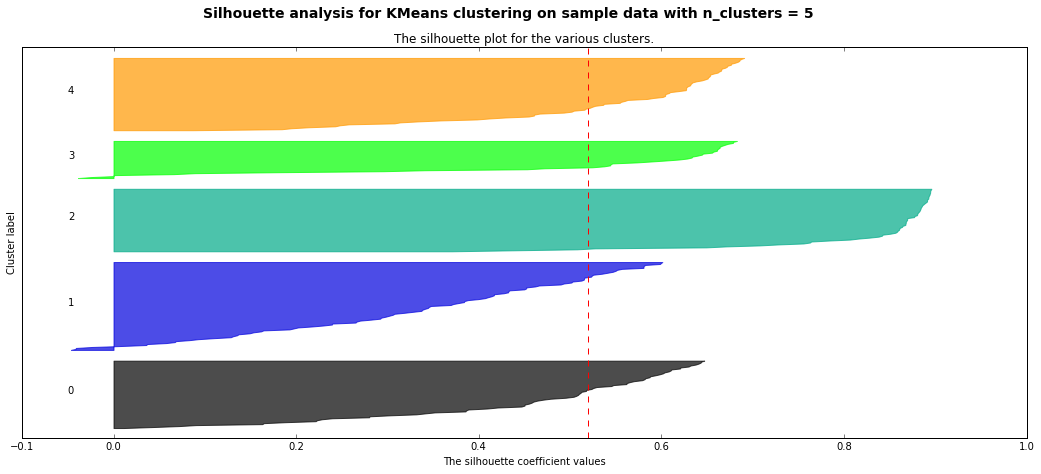

Keywords for cluster 0: git, use, nikola, post, using, org2blog, code, emacs, mode, org
Keywords for cluster 1: life, good, day, don, world, things, people, time, org, just
Keywords for cluster 2: like, use, people, using, things, time, post, just, code, org
Keywords for cluster 3: stuff, post, day, like, don, code, things, people, time, just
Keywords for cluster 4: github, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 5: blog, org2blog, work, use, using, post, code, emacs, mode, org

Titles for cluster 0:     Clock in and get-shit-done     Say Howdy with Emacs!     Jabber message queue     Using tmux to "screen share"     More input sources for org-drill     Recurse Center, 2014-08-26     Recurse Center, 2014-08-20     Recurse Center, 2014-08-17     Recurse Center, 2014-08-12     Recurse Center, 2014-08-08     Recurse Center, 2014-08-07     Recurse Center, 2014-08-05     Recurse Center, 2014-08-04     Recurse Center, 2014-07-21     Recurse 

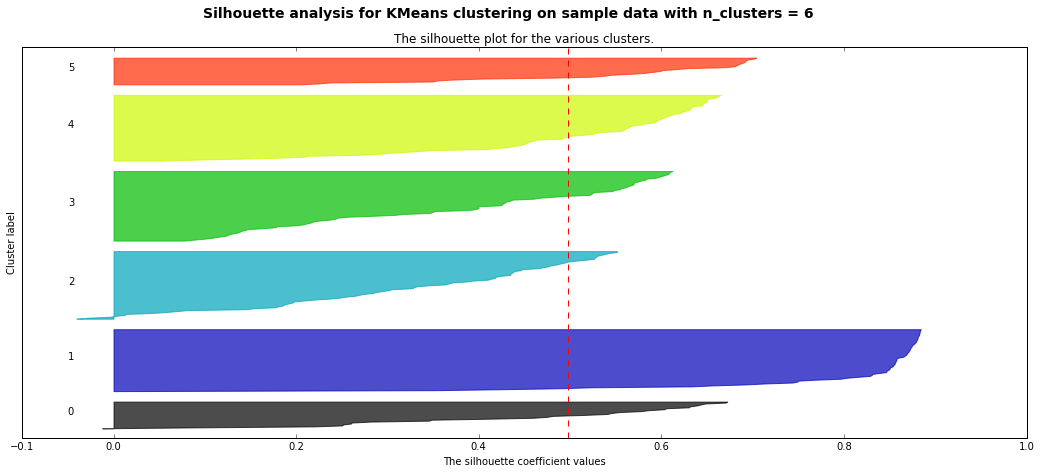

Keywords for cluster 0: don, work, like, post, people, things, code, time, tags, just
Keywords for cluster 1: use, like, people, using, things, post, time, just, code, org
Keywords for cluster 2: git, use, nikola, post, using, org2blog, code, emacs, mode, org
Keywords for cluster 3: good, world, day, like, code, don, things, people, time, just
Keywords for cluster 4: org2blog, blog, work, use, using, post, emacs, code, mode, org
Keywords for cluster 5: github, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 6: life, good, day, don, world, things, people, time, org, just

Titles for cluster 0:     Recurse Center, 2014-08-28     Bookmarks [2014-05-19]     Bookmarks [2014-05-04]     Bookmarks [2013-12-23]     Bookmarks [2013-12-10]     Bookmarks [2013-11-25]     Bookmarks [2013-11-17]     Cold     Surat Ultimate Open     Just one day     Selling Temples -- A How-to     Hand in Glove     Love Unvoiced     To Ananthagiri     JP - 19th Century Polit

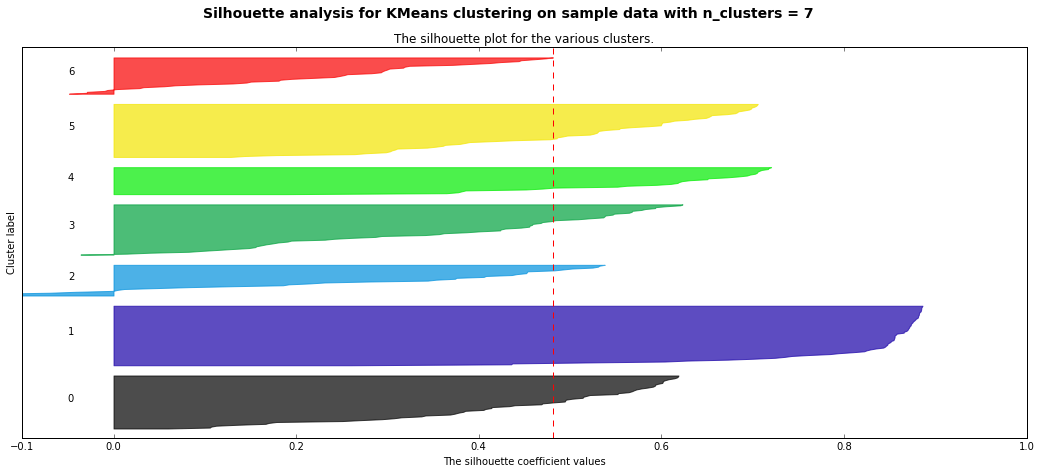

Keywords for cluster 0: fails, failure, fair, fairly, fairy, faith, fake, fall, exception, रत
Keywords for cluster 1: good, world, code, like, day, don, things, people, time, just
Keywords for cluster 2: time, blog, work, use, using, post, emacs, code, mode, org
Keywords for cluster 3: life, good, day, don, world, things, time, people, org, just
Keywords for cluster 4: use, like, people, using, things, post, time, just, code, org
Keywords for cluster 5: github, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 6: work, don, post, like, things, people, code, tags, time, just
Keywords for cluster 7: git, use, nikola, post, using, org2blog, code, emacs, mode, org

Titles for cluster 0:     blog-admin and Nikola     Elfeed hook to fetch full content     Playing music using mpsyt from Emacs     org-drill for making it stick!     How I learnt to use Emacs' profiler     erc-notifications when Emacs not in focus     More input sources for org-drill     

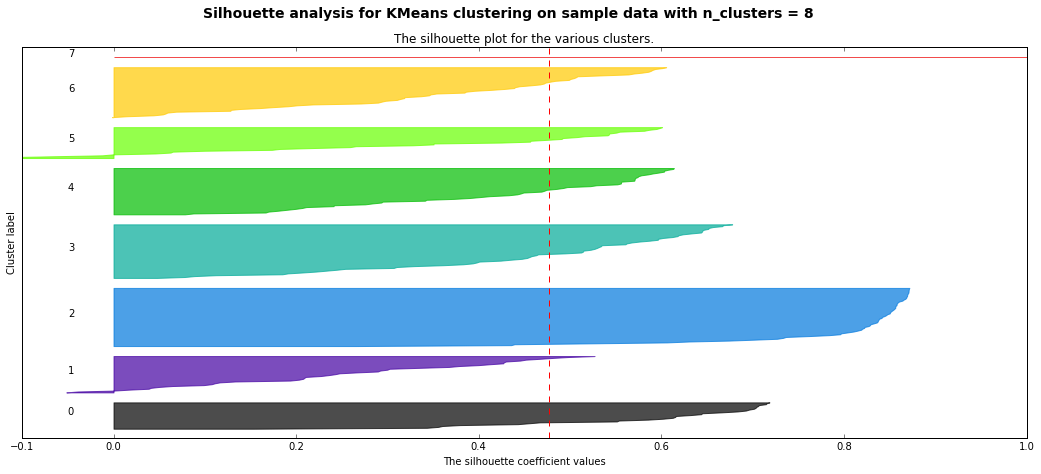

Keywords for cluster 0: stuff, day, don, like, post, people, things, code, time, just
Keywords for cluster 1: don, work, like, post, people, things, code, time, just, tags
Keywords for cluster 2: fails, failure, fair, fairly, fairy, faith, fake, fall, exception, रत
Keywords for cluster 3: git, use, nikola, post, using, org2blog, code, emacs, mode, org
Keywords for cluster 4: life, good, day, don, world, things, time, people, org, just
Keywords for cluster 5: use, things, emacs, mode, using, time, just, post, code, org
Keywords for cluster 6: blog, org2blog, work, use, using, post, code, emacs, mode, org
Keywords for cluster 7: github, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 8: good, code, like, world, day, don, things, people, time, just

Titles for cluster 0:     Save the Map -- Please respond     Deoriatal and Chandrashila     Book Review: 5 Love Languages     Recurse Center, 2014-07-31     Recurse Center, 2014-06-25     Recurse Cent

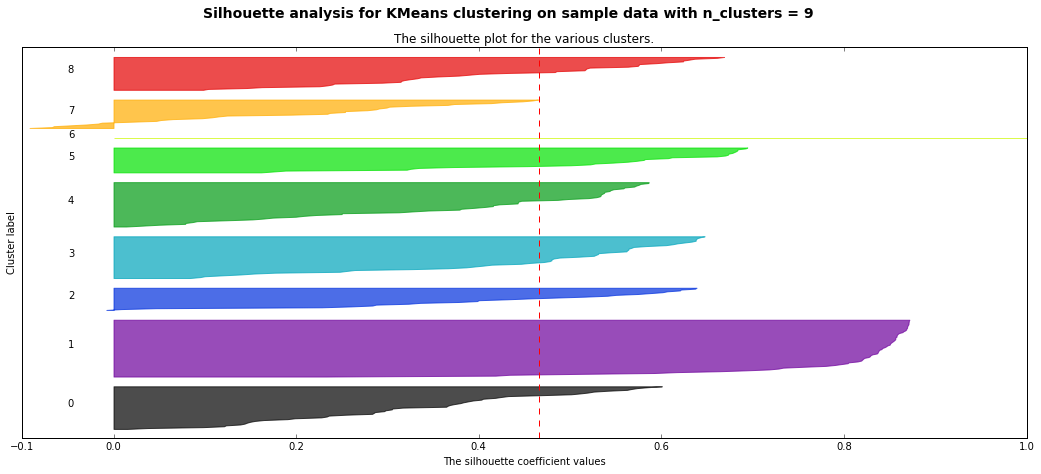

Keywords for cluster 0: hack, tips, howto, writing, awesome, software, programming, advice, life, tags
Keywords for cluster 1: fails, failure, fair, fairly, fairy, faith, fake, fall, exception, रत
Keywords for cluster 2: stuff, day, post, don, like, code, things, people, time, just
Keywords for cluster 3: don, work, like, post, people, things, code, time, just, tags
Keywords for cluster 4: blog, org2blog, work, use, using, post, code, emacs, mode, org
Keywords for cluster 5: org, good, like, day, world, don, things, people, time, just
Keywords for cluster 6: git, use, nikola, post, using, org2blog, code, emacs, mode, org
Keywords for cluster 7: good, life, day, don, world, things, time, people, just, org
Keywords for cluster 8: emacs, use, mode, things, using, time, just, post, code, org
Keywords for cluster 9: git, hack, tips, howto, awesome, software, life, programming, advice, tags

Titles for cluster 0:     Bookmarks [2013/03/14]     Bookmarks [2012/09/18]     Bookmarks [2012/08/28

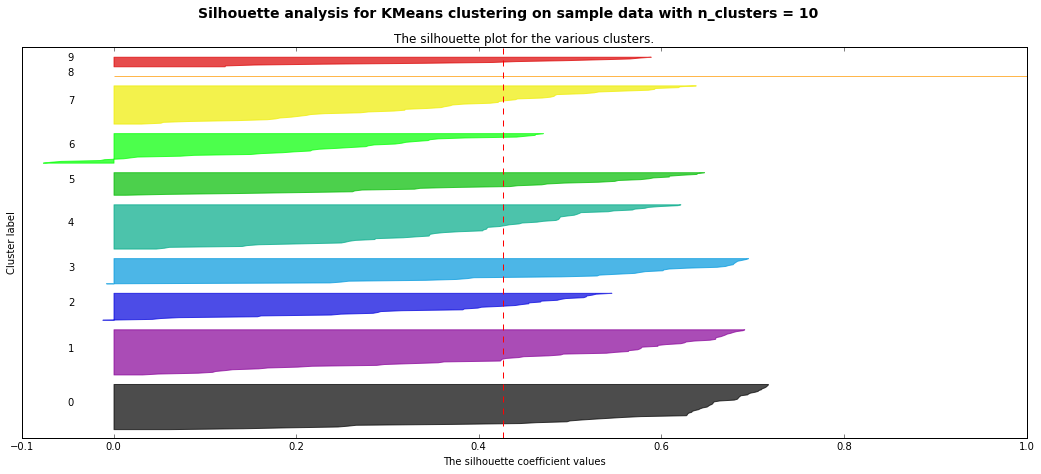

Keywords for cluster 0: good, life, day, don, world, things, time, people, just, org
Keywords for cluster 1: using, people, work, things, post, time, just, tags, org, code
Keywords for cluster 2: fails, failure, fair, fairly, fairy, faith, fake, fall, exception, रत
Keywords for cluster 3: hack, tips, howto, writing, awesome, software, programming, advice, life, tags
Keywords for cluster 4: blog, org2blog, work, use, using, post, code, emacs, mode, org
Keywords for cluster 5: stuff, day, post, like, don, code, things, people, time, just
Keywords for cluster 6: day, like, don, life, code, things, people, time, tags, just
Keywords for cluster 7: git, use, nikola, post, using, org2blog, code, emacs, mode, org
Keywords for cluster 8: like, good, org, day, don, world, things, people, time, just
Keywords for cluster 9: git, hack, tips, howto, awesome, software, life, programming, advice, tags
Keywords for cluster 10: like, mode, use, using, things, time, just, post, code, org

Titles for clus

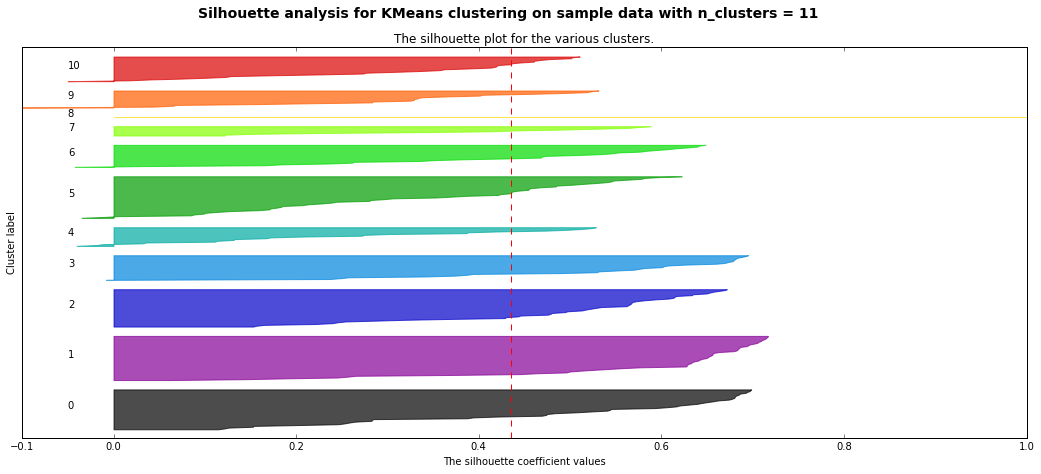

Keywords for cluster 0: awesome, life, mode, software, git, emacs, programming, advice, org, tags
Keywords for cluster 1: like, day, don, code, life, things, people, tags, time, just
Keywords for cluster 2: fails, failure, fair, fairly, fairy, faith, fake, fall, exception, रत
Keywords for cluster 3: good, life, day, don, world, things, time, people, just, org
Keywords for cluster 4: blog, work, org2blog, use, using, post, code, emacs, mode, org
Keywords for cluster 5: like, work, people, post, org, things, time, just, code, tags
Keywords for cluster 6: stuff, day, don, post, like, code, things, people, time, just
Keywords for cluster 7: git, hack, tips, howto, awesome, software, programming, life, advice, tags
Keywords for cluster 8: git, use, nikola, post, using, org2blog, code, emacs, mode, org
Keywords for cluster 9: org, like, good, day, don, world, things, people, time, just
Keywords for cluster 10: use, emacs, things, mode, using, time, just, post, code, org
Keywords for cluster 

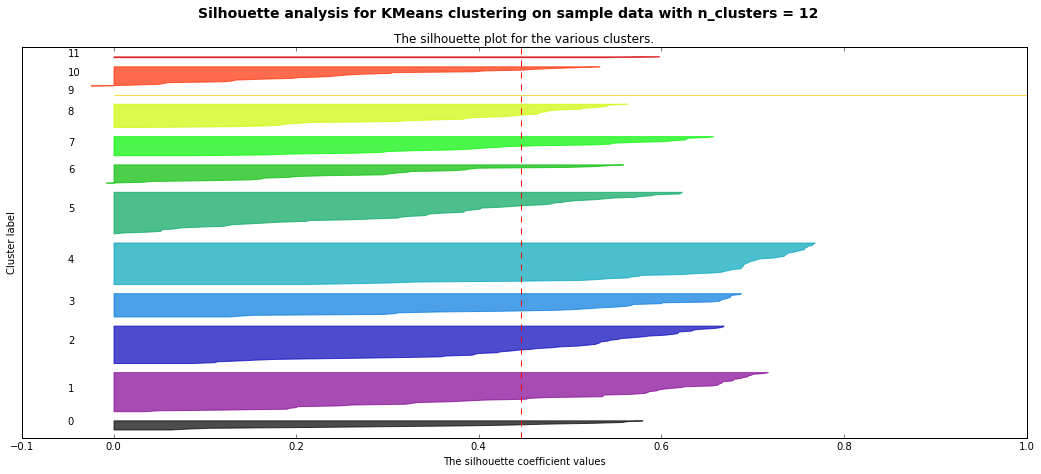

Keywords for cluster 0: stuff, day, don, like, post, people, things, code, time, just
Keywords for cluster 1: hack, tips, howto, writing, awesome, software, programming, advice, life, tags
Keywords for cluster 2: use, git, nikola, post, using, code, org2blog, emacs, mode, org
Keywords for cluster 3: mode, day, life, don, world, things, time, people, just, org
Keywords for cluster 4: people, using, work, things, post, time, just, tags, org, code
Keywords for cluster 5: fails, failure, fair, fairly, fairy, faith, fake, fall, exception, रत
Keywords for cluster 6: good, world, like, day, code, don, things, people, time, just
Keywords for cluster 7: blog, org2blog, work, use, using, post, code, emacs, mode, org
Keywords for cluster 8: like, good, day, don, world, org, things, people, time, just
Keywords for cluster 9: use, emacs, things, mode, using, time, just, post, code, org
Keywords for cluster 10: blog, nikola, use, org2blog, using, post, code, emacs, mode, org
Keywords for cluster 11:

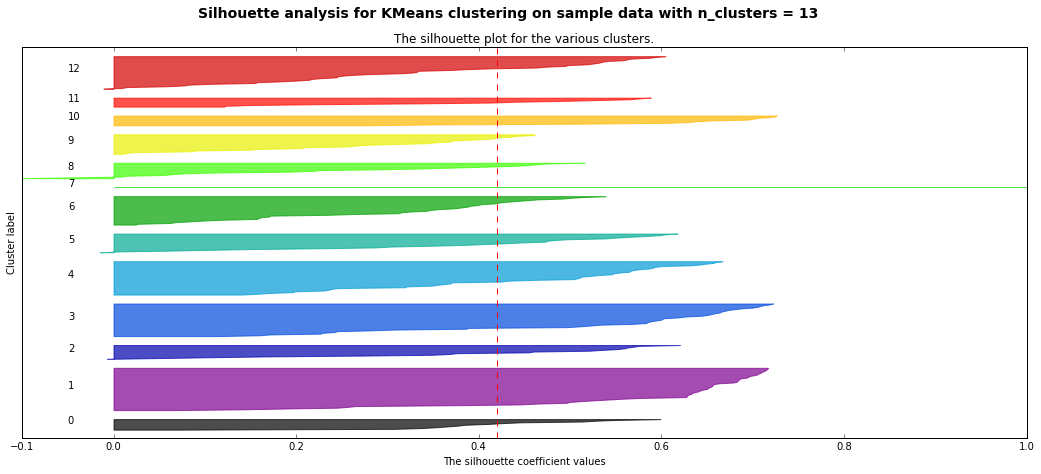

Keywords for cluster 0: world, day, don, code, life, things, people, time, tags, just
Keywords for cluster 1: awesome, life, mode, software, git, emacs, programming, advice, org, tags
Keywords for cluster 2: like, good, org, day, don, world, things, people, time, just
Keywords for cluster 3: blog, org2blog, work, use, using, post, code, emacs, mode, org
Keywords for cluster 4: use, git, nikola, post, using, code, org2blog, emacs, mode, org
Keywords for cluster 5: hack, tips, howto, writing, awesome, software, programming, advice, life, tags
Keywords for cluster 6: fails, failure, fair, fairly, fairy, faith, fake, fall, exception, रत
Keywords for cluster 7: good, world, day, like, don, code, things, people, time, just
Keywords for cluster 8: like, work, people, post, org, things, time, just, code, tags
Keywords for cluster 9: use, things, emacs, mode, using, time, just, post, code, org
Keywords for cluster 10: good, life, day, don, world, things, time, people, just, org
Keywords for clu

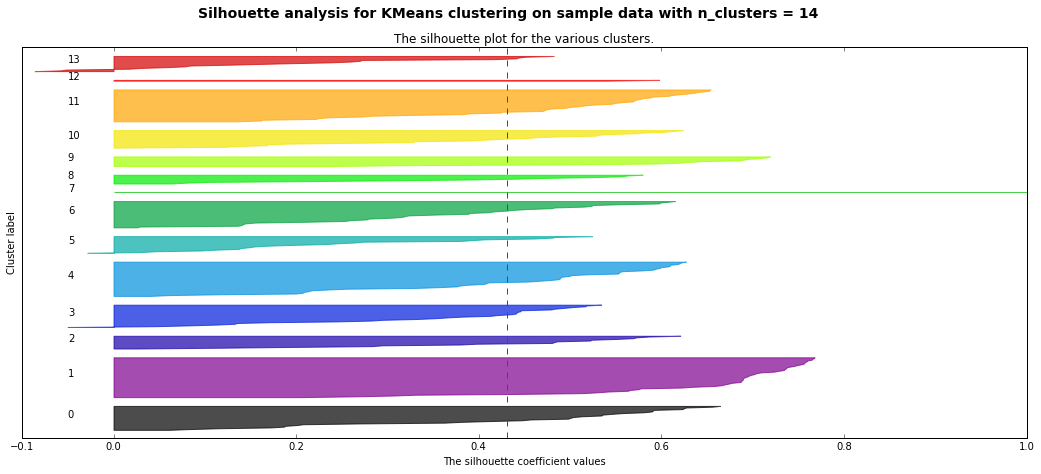

In [54]:
"""
===============================================================================
Selecting the number of clusters with silhouette analysis on KMeans clustering
===============================================================================

Silhouette analysis can be used to study the separation distance between the
resulting clusters. The silhouette plot displays a measure of how close each
point in one cluster is to points in the neighboring clusters and thus provides
a way to assess parameters like number of clusters visually. This measure has a
range of [-1, 1].

Silhoette coefficients (as these values are referred to as) near +1 indicate
that the sample is far away from the neighboring clusters. A value of 0
indicates that the sample is on or very close to the decision boundary between
two neighboring clusters and negative values indicate that those samples might
have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for
``n_clusters``. The silhouette plot shows that the ``n_clusters`` value of 3, 5
and 6 are a bad pick for the given data due to the presence of clusters with
below average silhouette scores and also due to wide fluctuations in the size
of the silhouette plots. Silhouette analysis is more ambivalent in deciding
between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be
visualized. The silhouette plot for cluster 0 when ``n_clusters`` is equal to
2, is bigger in size owing to the grouping of the 3 sub clusters into one big
cluster. However when the ``n_clusters`` is equal to 4, all the plots are more
or less of similar thickness and hence are of similar sizes as can be also
verified from the labelled scatter plot on the right.
"""

from __future__ import print_function

import codecs

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np



if __name__ == '__main__':
    print(__doc__)


    posts, X, vocabulary = get_nikola_vectors()

    n_components = 3

    if n_components:
        print('Dimensionality reduction')
        from sklearn.decomposition import TruncatedSVD
        from sklearn.pipeline import make_pipeline
        from sklearn.preprocessing import Normalizer

        svd = TruncatedSVD(n_components)
        normalizer = Normalizer(copy=False)
        lsa = make_pipeline(svd, normalizer)

        X = lsa.fit_transform(X)


    posts_ = np.array(posts)

    print(X.shape)

    range_n_clusters = range(2, 15)

    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, ax1 = plt.subplots(1, 1)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, X.shape[0] + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, n_init=20, max_iter=1000, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        if n_components:
            original_space_centroids = svd.inverse_transform(clusterer.cluster_centers_)
            ordered_cluter_indices = np.abs(original_space_centroids).argsort()[:, -10:][::-1]

        else:
            ordered_cluter_indices = np.abs(clusterer.cluster_centers_).argsort()[:, -10:][::-1]

        for i, cluster_indices in enumerate(ordered_cluter_indices):
            keywords_ = [vocabulary[index] for index in cluster_indices]
            print('Keywords for cluster {}: {}'.format(i, ', '.join(keywords_)))

        print()

        for i, cluster_indices in enumerate(ordered_cluter_indices):
            titles = ['    {}'.format(p.title()) for p in posts_[cluster_labels==i]]
            a, b = 30, len(titles)
            print('Titles for cluster {}: {}'.format(i, ' '.join(titles[:a] + titles[max(a, b-a):])))
            print()

        print()

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhoutte score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        # colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
        # ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
        #             c=colors)

        # Labeling the clusters
        # centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        # ax2.scatter(centers[:, 0], centers[:, 1],
        #             marker='o', c="white", alpha=1, s=200)

        # for i, c in enumerate(centers):
        #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        # ax2.set_title("The visualization of the clustered data.")
        # ax2.set_xlabel("Feature space for the 1st feature")
        # ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()


# Affinity Propogation


Demo of affinity propagation clustering algorithm

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007


[  0   1  48  61   7   7   2   3   7  61  61   7   7  61  61  61  61  61
  61  61  30   7   7  61   7  61  12   4   7  61  12   7   7   6  48   7
   7   6  12   7   7   7  61   7   7   7   7   7   5   6  12   7   7  48
   7  12  61   7  12   7   7   7   7   7  12   7   7  12   7   7   7   7
   7   7   7   8   7   7  48  48   7   7   7  48   7  48   6  12  12   9
  69  24  10  11  61  29  12   6  13  14  15  16   6  69  17  44  29  18
  19  20   6  69  12  21  22  23  24  25  69  61  30  26  27  28  44  61
  29  61  30  31  37  32  37  37  61  37  48   7  33  34  69  37  48  35
  37  61  37  61  37  37  37  37  37  36  37  37  37  37  37  37  12  37
  61  37  37  38  39  37  37  37  37  37  37  37  37  12  37  37  37  37
   6  37  37  37  37  37  37  61  61  61  37  37  61  37  61  37  37  40
  37  44  37  37   7  61 

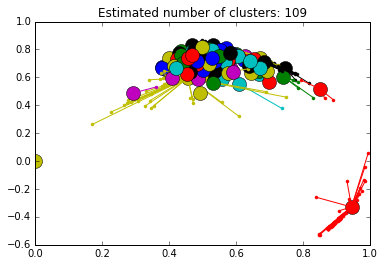

In [56]:
"""
=================================================
Demo of affinity propagation clustering algorithm
=================================================

Reference:
Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007

"""
print(__doc__)

import numpy as np
from sklearn.cluster import AffinityPropagation
from sklearn import metrics


##############################################################################
# Generate sample data
# centers = [[1, 1], [-1, -1], [1, -1]]
# X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
#                             random_state=0)

posts_ = np.array(posts)

##############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-10).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print(labels)

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

cluster_centers = X[cluster_centers_indices]
ordered_cluter_indices = np.abs(cluster_centers).argsort()[:, :10]

for i, cluster_indices in enumerate(ordered_cluter_indices):
    keywords_ = [vocabulary[index] for index in cluster_indices]
    print('Keywords for cluster {}: {}'.format(i, ', '.join(keywords_)))

print()

for i, cluster_indices in enumerate(ordered_cluter_indices):
    titles = ['    {}'.format(p.title()) for p in posts_[labels==i]]
    a, b = 30, len(titles)
    print('Titles for cluster {}: {}'.format(i, ' '.join(titles[:a] + titles[max(a, b-a):])))
    print()

print()


##############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


# Majorclust

In [50]:
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.base import BaseEstimator, ClusterMixin

class MajorClust(BaseEstimator, ClusterMixin):
    """Perform MajorClust clustering of data."""
    
    def fit(self, X):
        """Perform MajorClust on the given data.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape (n_samples, n_features)
            New data to predict.
            
        Returns
        -------
        labels : array, shape (n_samples,)
            Index of the cluster each sample belongs to.
            
        """

        # convert sparse matrix to array
        if hasattr(X, 'toarray'):
            X = X.toarray()

        n_samples, _ = X.shape
        cosine_distances = 1 - cdist(X, X, 'cosine')
        np.fill_diagonal(cosine_distances, 0)

        finished = False
        labels = np.arange(n_samples)
        while not finished:
            finished = True
            for i in range(n_samples):
                j = np.argmax(cosine_distances[i])
                if labels[i] != labels[j]:
                    labels[i] = labels[j]
                    finished = False
                    
        sorted_labels = sorted(set(labels))
        self.labels_ = np.array([sorted_labels.index(label) for label in labels])
                        
        return self


def visualize_clusters(X, documents, labels, vocabulary):
    clusters = {}

    for i, label in enumerate(labels):
        clusters.setdefault(label, []).append((X[i], documents[i]))

    for cluster in clusters:
        print(80*"=")
        for vector, title in clusters[cluster]:
            print('{} - {}'.format(title, ','.join(top_words(vector, vocabulary))))

    return clusters


def top_words(vector, vocabulary, n=10):
    return [vocabulary[i] for i in np.argsort(vector.toarray()[0])[::-1][:n]]


labels = MajorClust().fit_predict(X)
print(set(labels))
visualize_clusters(X, TITLES, labels, VOCABULARY)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72}
Elfeed hook to fetch full content - entry,content,url,feed,hook,entries,pc,list,pinboard,fetch
Playing music using mpsyt from Emacs - url,buffer,point,bounds,pc,term,play,youtube,process,send
A couple of counting functions - count,beg,active,end,point,chars,number,buffer,words,min
Error messages and new users - tool,messages,javascript,error,users,active,development,developers,stack,trying
Say Howdy with Emacs! - touch,hooks,contact,db,contacts,management,agenda,email,hook,contribute
Jabber message queue - jabber,queue,messages,chat,online,send,email,instead,interface,connect
Clock in and get-shit-done - shit,habit,shell,sudo,command,gnome,enter,clock,password,root
erc-notifications when Emacs not in focus -

{0: [(<1x3604 sparse matrix of type '<class 'numpy.float64'>'
   	with 80 stored elements in Compressed Sparse Row format>,
   'Elfeed hook to fetch full content'),
  (<1x3604 sparse matrix of type '<class 'numpy.float64'>'
   	with 107 stored elements in Compressed Sparse Row format>,
   'Playing music using mpsyt from Emacs'),
  (<1x3604 sparse matrix of type '<class 'numpy.float64'>'
   	with 36 stored elements in Compressed Sparse Row format>,
   'A couple of counting functions')],
 1: [(<1x3604 sparse matrix of type '<class 'numpy.float64'>'
   	with 77 stored elements in Compressed Sparse Row format>,
   'Error messages and new users'),
  (<1x3604 sparse matrix of type '<class 'numpy.float64'>'
   	with 94 stored elements in Compressed Sparse Row format>,
   'Say Howdy with Emacs!'),
  (<1x3604 sparse matrix of type '<class 'numpy.float64'>'
   	with 60 stored elements in Compressed Sparse Row format>,
   'Jabber message queue')],
 2: [(<1x3604 sparse matrix of type '<class 'nump